<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[Forecasting Global Ionospheric TEC Using Deep Learning Approach](https://doi.org/10.1029/2020SW002501)

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [ ]:
ls

 0001.jpg
 85192060-Los-cincuenta-anos-de-Jicamarca.pdf
'98 FORMATO  DEDICATORIA APG.doc (1).docx'
'ATRAD presentación 1 ROJ.gslides'
 Classroom/
'Colab Notebooks'/
'COMPENDIO FAJARDO SORIA'/
'Copia de Checklist para discusiones públicas.gsheet'
'Copia de CitiesExt.csv.gsheet'
'Copia de Copia de Copia de TESIS FAJARDO SORIA GEORGE Presentación Final.gslides'
'Copia de deltaV station keeping .gdoc'
'Copia de Manual Sesiones de Prueba de Amanecidas Hackspace.gdoc'
'Copia de PlayersExt.csv.gsheet'
'Copia de Process Flow Diagram Template.gdraw'
'Copia de TESIS FAJARDO SORIA GEORGE Presentación Final (1).gslides'
'Copia de TESIS FAJARDO SORIA GEORGE Presentación Final.gslides'
'Copia de yqw-xmbf-pkw - 3 de dic. de 2020.gjam'
'coreupgrade retos'/
 Cuentas.gsheet
 curso-frances.pdf
'Documento sin título (1).gdoc'
'Documento sin título (2).gdoc'
'Documento sin título.gdoc'
'ECI TESIS FAJARDO SORIA GEORGE Presentación Final (1).gslides'
'ECI TESIS FAJARDO SORIA GEORGE Presentación Fin

Este paper utiliza RNN con arquitecturas LSTM para predecir condiciones de TEC.


In [ ]:
https://github.com/georgesteve/Research-Assitant-ML-ROJ.git

In [1]:
import pandas
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/gfajardo_uNz2xU-2020-2.csv"
Data = pandas.read_csv(URL,index_col=False) 
df=Data.drop(columns=['Unnamed: 0'])


In [2]:
print(df)

        Año  Day  Tiempo  PRN    S4     Az   Elv
0        20  306      22    3  0.10  300.9  24.6
1        20  306      22    8  0.05  199.5  47.2
2        20  306      22   10  0.40  147.1  14.3
3        20  306      22   11  0.08  210.6  26.2
4        20  306      22   16  0.04  342.4  42.3
...     ...  ...     ...  ...   ...    ...   ...
452982   20  337   85540   21  0.05  159.0  48.7
452983   20  337   85540   22  0.08  206.3  42.2
452984   20  337   85540   27  0.06   22.7  36.8
452985   20  337   85540   31  0.20   89.3  15.1
452986   20  337   85540  138  0.04  288.3  50.6

[452987 rows x 7 columns]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [4]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [12]:
S4=df['S4'].values
time = np.arange(S4.size, dtype="float32")
print(time.size)
print(S4.size)

452987
452987


In [57]:
split_time = 10000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:12000]
x_valid = series[split_time:12000]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000
print(series.size)
print(x_train.size)
print(list(windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)))


Se han truncado las últimas 5000 líneas del flujo de salida.
         49.22129  ,  45.29673  ,  48.144333 ,  43.245922 ,  46.676632 ,
         45.44373  ,  52.040035 ,  47.452827 ,  47.84891  ,  44.082253 ]],
      dtype=float32)>, <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([ 8.140686, 18.891466, 28.57245 , 32.178864, 47.470825, 59.62124 ,
       79.58758 , 55.690018, 57.16999 , 94.09911 , 24.280926, 44.08511 ,
       86.32665 , 86.09752 , 89.2171  , 68.47448 , 30.18544 , 42.99061 ,
       26.097902, 12.202472, 24.28527 , 12.274111, 68.2896  , 78.02643 ,
       77.38166 , 49.968773, 86.64589 , 49.154957, 46.493633, 77.877266,
       34.665504, 43.68492 ], dtype=float32)>), (<tf.Tensor: shape=(32, 20), dtype=float32, numpy=
array([[ 54.642056 ,  61.834522 ,  51.983303 ,  56.19019  ,  67.919136 ,
         68.053764 ,  66.2601   ,  59.30633  ,  63.911392 ,  64.14101  ,
         58.376602 ,  71.69516  ,  68.57505  ,  63.09382  ,  64.34379  ,
         65.262314 ,  54.023083 ,  63.

In [15]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
46/46 [==============================] - 7s 26ms/step - loss: 28.6806 - mae: 29.1742
Epoch 2/100
46/46 [==============================] - 1s 24ms/step - loss: 28.4430 - mae: 28.9374
Epoch 3/100
46/46 [==============================] - 1s 24ms/step - loss: 27.6929 - mae: 28.1860
Epoch 4/100
46/46 [==============================] - 1s 25ms/step - loss: 26.2540 - mae: 26.7481
Epoch 5/100
46/46 [==============================] - 1s 24ms/step - loss: 25.2205 - mae: 25.7166
Epoch 6/100
46/46 [==============================] - 1s 25ms/step - loss: 23.5169 - mae: 24.0119
Epoch 7/100
46/46 [==============================] - 1s 25ms/step - loss: 22.7700 - mae: 23.2605
Epoch 8/100
46/46 [==============================] - 1s 24ms/step - loss: 21.7034 - mae: 22.1989
Epoch 9/100
46/46 [==============================] - 1s 25ms/step - loss: 21.4544 - mae: 21.9519
Epoch 10/100
46/46 [==============================] - 1s 25ms/step - loss: 20.8230 - mae: 21.3197
Epoch 11/100
46/46 [=========

(1e-08, 0.01, 0.0, 30.0)

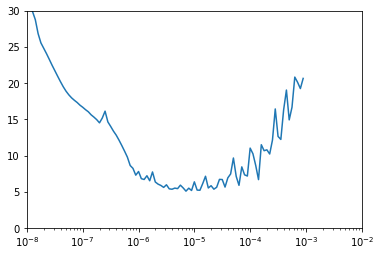

In [18]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-2, 0, 30])

In [51]:
window_size = 3
batch_size = 4
shuffle_buffer_size = 1000
number_features=2

inputs=tf.random.normal([batch_size, window_size, number_features])
print(inputs)

tf.Tensor(
[[[ 1.1195334   2.4066155 ]
  [-0.8676916   1.825039  ]
  [ 2.2344441  -0.3977956 ]]

 [[ 0.8849293   0.26917085]
  [-0.54165137 -0.7908626 ]
  [-0.34675348 -0.12477605]]

 [[ 0.98363346 -0.7453095 ]
  [ 1.2810434   0.49839592]
  [ 0.25430754 -1.124748  ]]

 [[-0.5088604   0.70859563]
  [ 0.4550006  -0.90251327]
  [-0.42548168 -0.41182923]]], shape=(4, 3, 2), dtype=float32)


In [56]:

lstm = tf.keras.layers.LSTM(5)

output = lstm(inputs)
model = tf.keras.models.Sequential([tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
                      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(2)),                  ])

output2 = model(inputs)
print(output2.shape)

ValueError: ignored

In [53]:
print(output2)

tf.Tensor(
[[[[ 1.1195334 ]
   [ 2.4066155 ]]

  [[-0.8676916 ]
   [ 1.825039  ]]

  [[ 2.2344441 ]
   [-0.3977956 ]]]


 [[[ 0.8849293 ]
   [ 0.26917085]]

  [[-0.54165137]
   [-0.7908626 ]]

  [[-0.34675348]
   [-0.12477605]]]


 [[[ 0.98363346]
   [-0.7453095 ]]

  [[ 1.2810434 ]
   [ 0.49839592]]

  [[ 0.25430754]
   [-1.124748  ]]]


 [[[-0.5088604 ]
   [ 0.70859563]]

  [[ 0.4550006 ]
   [-0.90251327]]

  [[-0.42548168]
   [-0.41182923]]]], shape=(4, 3, 2, 1), dtype=float32)
